In [1]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt

# Load datasets
doh_df = pd.read_csv('l1-doh.csv')
nondoh_df = pd.read_csv('l1-nondoh.csv')

# Drop unwanted columns
drop_columns = ['SourceIP', 'DestinationIP', 'SourcePort', 'DestinationPort', 'TimeStamp']
doh_df = doh_df.drop(columns=drop_columns)
nondoh_df = nondoh_df.drop(columns=drop_columns)

# Combine datasets
df = pd.concat([doh_df, nondoh_df])

# Separate features and target
X = df.drop(columns=['Label'])
y = df['Label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Genetic algorithm setup
def evaluate(individual):
    selected_features = [index for index, bit in enumerate(individual) if bit == 1]
    if len(selected_features) == 0:
        return 0,
    
    X_train_selected = X_train.iloc[:, selected_features]
    X_test_selected = X_test.iloc[:, selected_features]

    model = lgb.LGBMClassifier(verbose=-1)
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    return accuracy_score(y_test, y_pred),

toolbox = base.Toolbox()
creator.create('FitnessMax', base.Fitness, weights=(1.0,))
creator.create('Individual', list, fitness=creator.FitnessMax)

toolbox.register('attr_bool', np.random.randint, 2)
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(X_train.columns))
toolbox.register('population', tools.initRepeat, list, toolbox.individual)

toolbox.register('evaluate', evaluate)
toolbox.register('mate', tools.cxTwoPoint)
toolbox.register('mutate', tools.mutFlipBit, indpb=0.05)
toolbox.register('select', tools.selTournament, tournsize=3)

population = toolbox.population(n=50)
ngen = 20
cxpb = 0.5
mutpb = 0.2

result_pop, logbook = algorithms.eaSimple(population, toolbox, cxpb, mutpb, ngen, verbose=False)

# Extract the best individual
best_individual = tools.selBest(result_pop, k=1)[0]
selected_features = [index for index, bit in enumerate(best_individual) if bit == 1]

# Train the final model with selected features
X_train_selected = X_train.iloc[:, selected_features]
X_test_selected = X_test.iloc[:, selected_features]

final_model = lgb.LGBMClassifier(verbose=-1)
final_model.fit(X_train_selected, y_train)
y_pred = final_model.predict(X_test_selected)

# Print classification report and accuracy
print('Classification Report:')
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Plot the feature selection
generations = logbook.select('gen')
max_fitness_values = logbook.select('max')

plt.plot(generations, max_fitness_values, label='Max Fitness')
plt.xlabel('Generation')
plt.ylabel('Max Fitness Value')
plt.title('Feature Selection using Genetic Algorithm')
plt.legend()
plt.show()


KeyboardInterrupt: 

C:\Users\test\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\test\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Classification Report:
              precision    recall  f1-score   support

         DoH       1.00      0.99      0.99     53863
      NonDoH       1.00      1.00      1.00    179565

    accuracy                           1.00    233428
   macro avg       1.00      1.00      1.00    233428
weighted avg       1.00      1.00      1.00    233428

Accuracy: 0.9974596021042891
False Negatives: 111
False Positives: 482


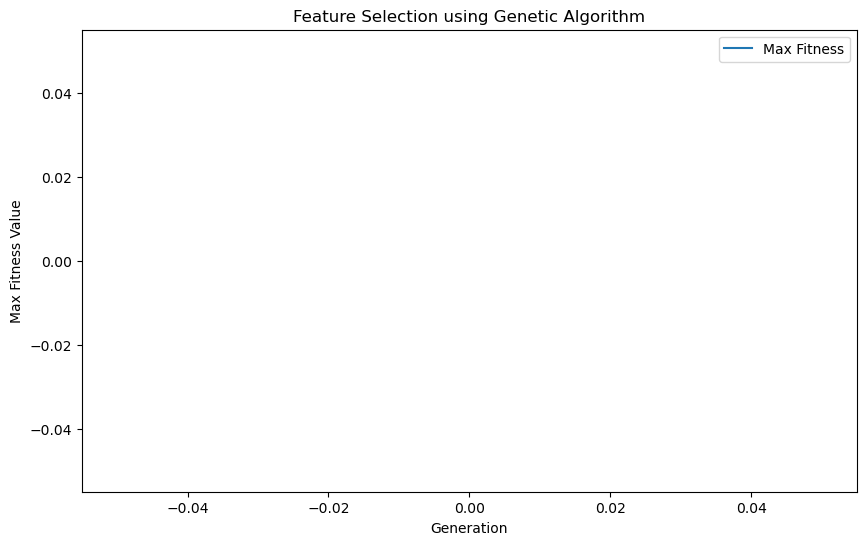

NameError: name 'sns' is not defined

<Figure size 800x600 with 0 Axes>

In [2]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt

# Load datasets
doh_df = pd.read_csv('l1-doh.csv')
nondoh_df = pd.read_csv('l1-nondoh.csv')

# Drop unwanted columns
drop_columns = ['SourceIP', 'DestinationIP', 'SourcePort', 'DestinationPort', 'TimeStamp']
doh_df = doh_df.drop(columns=drop_columns)
nondoh_df = nondoh_df.drop(columns=drop_columns)

# Combine datasets
df = pd.concat([doh_df, nondoh_df])

# Separate features and target
X = df.drop(columns=['Label'])
y = df['Label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Genetic algorithm setup
def evaluate(individual):
    selected_features = [index for index, bit in enumerate(individual) if bit == 1]
    if len(selected_features) == 0:
        return 0,
    
    X_train_selected = X_train.iloc[:, selected_features]
    X_test_selected = X_test.iloc[:, selected_features]

    model = lgb.LGBMClassifier(verbose=-1)
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    return accuracy_score(y_test, y_pred),

toolbox = base.Toolbox()
creator.create('FitnessMax', base.Fitness, weights=(1.0,))
creator.create('Individual', list, fitness=creator.FitnessMax)

toolbox.register('attr_bool', np.random.randint, 2)
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(X_train.columns))
toolbox.register('population', tools.initRepeat, list, toolbox.individual)

toolbox.register('evaluate', evaluate)
toolbox.register('mate', tools.cxTwoPoint)
toolbox.register('mutate', tools.mutFlipBit, indpb=0.05)
toolbox.register('select', tools.selTournament, tournsize=3)

population = toolbox.population(n=50)
ngen = 20
cxpb = 0.5
mutpb = 0.2

result_pop, logbook = algorithms.eaSimple(population, toolbox, cxpb, mutpb, ngen, verbose=False)

# Extract the best individual
best_individual = tools.selBest(result_pop, k=1)[0]
selected_features = [index for index, bit in enumerate(best_individual) if bit == 1]

# Train the final model with selected features
X_train_selected = X_train.iloc[:, selected_features]
X_test_selected = X_test.iloc[:, selected_features]

final_model = lgb.LGBMClassifier(verbose=-1)
final_model.fit(X_train_selected, y_train)
y_pred = final_model.predict(X_test_selected)

# Print classification report and accuracy
print('Classification Report:')
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
false_negatives = conf_matrix[1, 0]
false_positives = conf_matrix[0, 1]

print(f"False Negatives: {false_negatives}")
print(f"False Positives: {false_positives}")

# Plot the feature selection
generations = logbook.select('gen')
max_fitness_values = logbook.select('max')

plt.figure(figsize=(10, 6))
plt.plot(generations, max_fitness_values, label='Max Fitness')
plt.xlabel('Generation')
plt.ylabel('Max Fitness Value')
plt.title('Feature Selection using Genetic Algorithm')
plt.legend()
plt.show()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
